機械学習特論 第5回 分類 k近傍法 Fashion-MNIST の分類

In [1]:
# google colab で実行する場合は、次の行の先頭の # を削除してこのブロックを実行する
#!pip install japanize-matplotlib

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:
# Fashion-MNISTデータセットをダウンロードして、実験用データを準備
from sklearn.datasets import fetch_openml
mnist_data = fetch_openml('Fashion-MNIST')
_x = np.array(mnist_data['data'].astype(np.float32))
_y = np.array(mnist_data['target'].astype(np.int32))
# 処理時間の都合から、70000枚の画像のうち7000枚を対象とする (各画像を均等に (straify=y))
_, x, _, y = train_test_split(_x, _y, test_size=0.1, random_state=1, stratify=_y)

c:\Users\human\OneDrive - 埼玉大学\学部4年\04_後期授業\機械学習特論\python\env\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


xの形状: (7000, 784)
yの形状: (7000,) <class 'numpy.ndarray'>


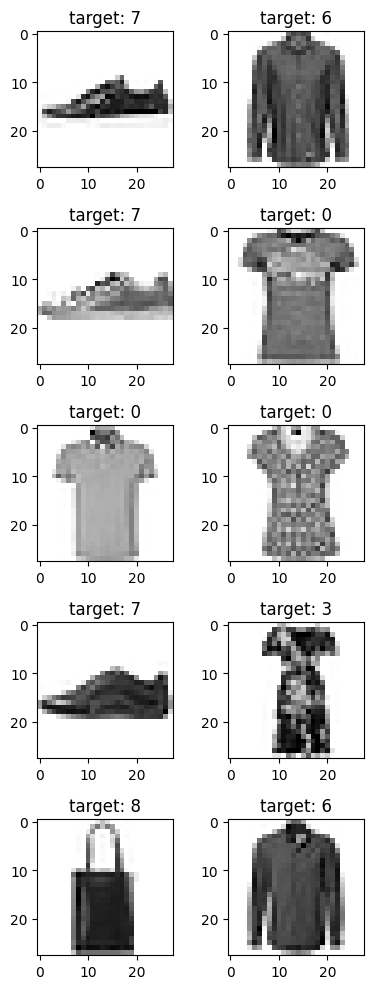

In [4]:
# ダウンロードしたデータセットを確認
print('xの形状:', x.shape)
print('yの形状:', y.shape, type(y))

# データセットに含まれる文字のイメージを表示 (2x5のレイアウトで最初の10画像)
rows, cols = 5, 2
fig, ax = plt.subplots(rows, cols, figsize=(4.0, 10.0), tight_layout=True)
for i in range(rows * cols):
    ax[i // cols][i % cols].imshow(x[i].reshape(28,28), cmap=plt.cm.gray_r)
    ax[i // cols][i % cols].set_title(f'target: {y[i]}')
plt.show()

In [5]:
# データセットに含まれる各画像数を確認
for i in range(10):
    n = 0
    for j in range(len(y)):
        if i == y[j]:
            n = n + 1
    print(f'{i}: {n}, ', end='')  # 各数字の画像数にバラツキあり

# データを学習用と検証用に分割 (検証用データに25%を割当て)
x_train, x_test, y_train, y_test = \
    train_test_split(x, y, test_size=0.25, random_state=1, stratify=y) # 各画像を均等に分割 (straify=y)
print('\n', len(x_train), len(x_test), len(y_train), len(y_test)) # それぞれのデータ数を確認

0: 700, 1: 700, 2: 700, 3: 700, 4: 700, 5: 700, 6: 700, 7: 700, 8: 700, 9: 700, 
 5250 1750 5250 1750


In [6]:
# k近傍法のモデルを学習データを利用して学習
clf_3 = KNeighborsClassifier(n_neighbors=3, # k を指定 (デフォルトは 5)
                             weights='uniform',  # 距離を考慮しない(uniform:デフォルト)、する(distance)
                             algorithm='auto', # 近傍点計算アルゴリズム (auto:デフォルト,ball_tree,kd_tree,brute)
                             leaf_size=30,  # ball_tree,kd_tree指定時のリーフサイズの設定 (デフォルトは 30)
                             p=2)  # 距離計算の次元 (2:デフォルト、1)
clf_3 = clf_3.fit(x_train, y_train)  # * y_trainの列指定はwarning回避のため *

# 学習したモデルの性能(正答率)を学習用データで評価
predict_3_train = clf_3.predict(x_train)
print('knn (k=3, train data) : accuracy_score', metrics.accuracy_score(y_train, predict_3_train))

# 学習したモデルの性能(正答率)を検証用データで評価
predict_3_test = clf_3.predict(x_test)
print('knn (k=3, test data) : accuracy_score', metrics.accuracy_score(y_test, predict_3_test))

knn (k=3, train data) : accuracy_score 0.8929523809523809
knn (k=3, test data) : accuracy_score 0.8028571428571428


0 : total 175 correct 142 precistion 0.8114285714285714
1 : total 175 correct 166 precistion 0.9485714285714286
2 : total 175 correct 125 precistion 0.7142857142857143
3 : total 175 correct 149 precistion 0.8514285714285714
4 : total 175 correct 126 precistion 0.72
5 : total 175 correct 128 precistion 0.7314285714285714
6 : total 175 correct 93 precistion 0.5314285714285715
7 : total 175 correct 157 precistion 0.8971428571428571
8 : total 175 correct 156 precistion 0.8914285714285715
9 : total 175 correct 163 precistion 0.9314285714285714


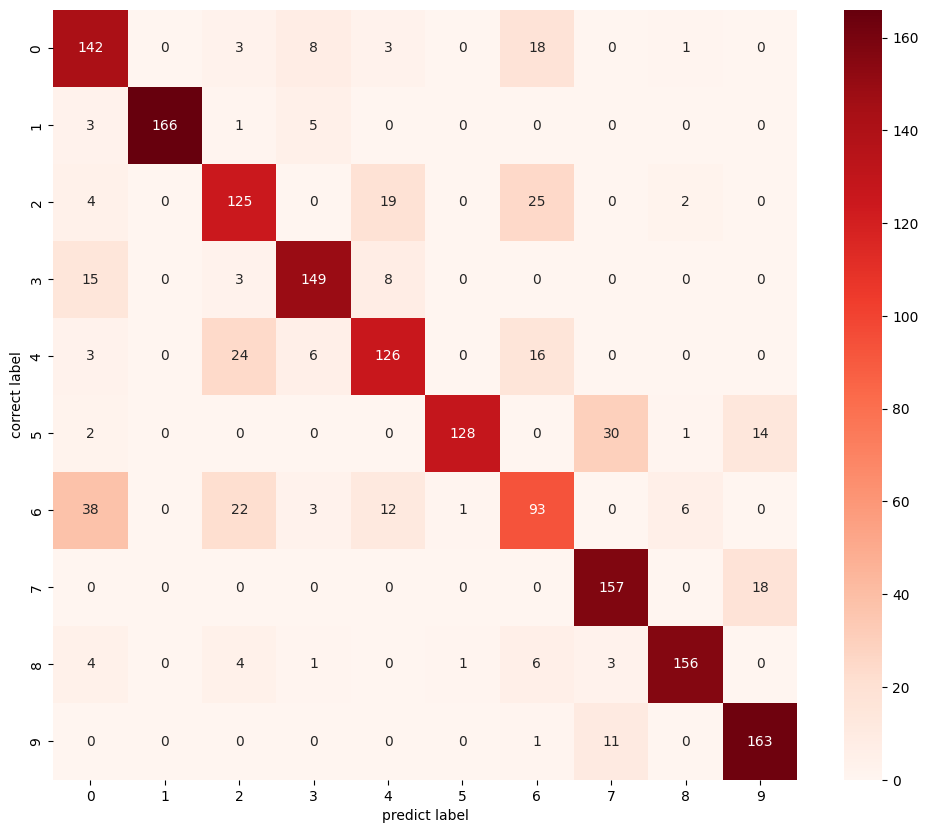

In [7]:
# 各画像の予測精度を確認
_p = predict_3_test.tolist()
for j in range(10):
    n = 0
    c = 0
    for i in range(len(_p)):
        if j == y_test[i]:
            n = n + 1
            if j == _p[i]:
                c = c + 1
    print(f'{j} : total {n} correct {c} precistion {c/n}')

# 混同行列を作成して、正解を縦軸、予測を横軸としてヒートマップを作成
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, _p)
plt.figure(figsize = (12, 10))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="Reds")
plt.ylabel('correct label')
plt.xlabel('predict label')
plt.show()

2 gt 2 -> predict 4
11 gt 4 -> predict 6
15 gt 0 -> predict 6
18 gt 6 -> predict 2
22 gt 3 -> predict 4
24 gt 2 -> predict 4
28 gt 4 -> predict 6
30 gt 1 -> predict 3
34 gt 3 -> predict 4
45 gt 0 -> predict 3
49 gt 2 -> predict 8
54 gt 8 -> predict 6
61 gt 2 -> predict 4
65 gt 2 -> predict 4
75 gt 2 -> predict 6
91 gt 6 -> predict 2
99 gt 6 -> predict 0
100 gt 7 -> predict 9
104 gt 6 -> predict 3
108 gt 2 -> predict 0
118 gt 9 -> predict 7
120 gt 2 -> predict 6
124 gt 5 -> predict 9
129 gt 7 -> predict 9
141 gt 5 -> predict 7
144 gt 7 -> predict 9
145 gt 6 -> predict 0
151 gt 2 -> predict 4
157 gt 1 -> predict 0
169 gt 4 -> predict 6
170 gt 2 -> predict 4
173 gt 1 -> predict 3
180 gt 4 -> predict 2
186 gt 3 -> predict 4
188 gt 6 -> predict 0
190 gt 6 -> predict 4
193 gt 3 -> predict 4
198 gt 6 -> predict 2
203 gt 5 -> predict 7
207 gt 7 -> predict 9
209 gt 4 -> predict 2
211 gt 9 -> predict 7
212 gt 6 -> predict 0
225 gt 2 -> predict 4
226 gt 6 -> predict 0
228 gt 4 -> predict 6
229 gt

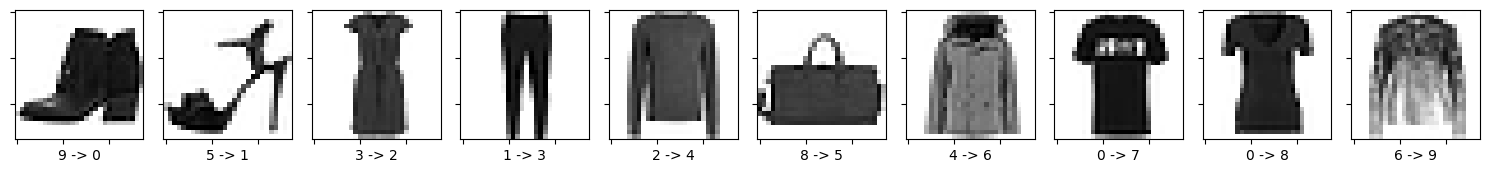

In [8]:
# 予測誤った画像のインデックスと正解と誤答を確認
for i in range(len(_p)):
    if _p[i] != y_test[i]:
        print(i, 'gt', y_test[i], '-> predict', _p[i])

# データセットに含まれる予測を誤った文字のイメージを表示 (5x2のレイアウトで)
img_no = [53, 1667, 13, 130, 2772, 834, 321, 365, 455, 389]
img_p = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rows, cols = 1, 10
fig, ax = plt.subplots(rows, cols, figsize=(15.0, 2.0), tight_layout=True)
for i in range(len(img_no)):
    ax[i].imshow(x[img_no[i]].reshape(28,28), cmap="binary", interpolation="nearest")
    ax[i].tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
    ax[i].set_xlabel(f'{y[img_no[i]]} -> {img_p[i]}')
plt.show()

5250 1750 5250 1750
(5250, 784) (5250,)
k=1 (train) 正解率 1.0 (test) 正解率 0.8028571428571428
k=2 (train) 正解率 0.912952380952381 (test) 正解率 0.7994285714285714
k=3 (train) 正解率 0.8946666666666667 (test) 正解率 0.8085714285714286
k=4 (train) 正解率 0.8784761904761905 (test) 正解率 0.8188571428571428
k=5 (train) 正解率 0.865904761904762 (test) 正解率 0.8182857142857143
k=6 (train) 正解率 0.8603809523809524 (test) 正解率 0.8154285714285714
k=7 (train) 正解率 0.8508571428571429 (test) 正解率 0.8228571428571428
k=8 (train) 正解率 0.8455238095238096 (test) 正解率 0.8165714285714286
k=9 (train) 正解率 0.8422857142857143 (test) 正解率 0.8165714285714286
k=10 (train) 正解率 0.8415238095238096 (test) 正解率 0.8171428571428572
k=11 (train) 正解率 0.8354285714285714 (test) 正解率 0.8142857142857143
k=12 (train) 正解率 0.8331428571428572 (test) 正解率 0.8154285714285714
k=13 (train) 正解率 0.8278095238095238 (test) 正解率 0.8148571428571428
k=14 (train) 正解率 0.8278095238095238 (test) 正解率 0.8148571428571428
k=15 (train) 正解率 0.824952380952381 (test) 正解率 0.81142857142857

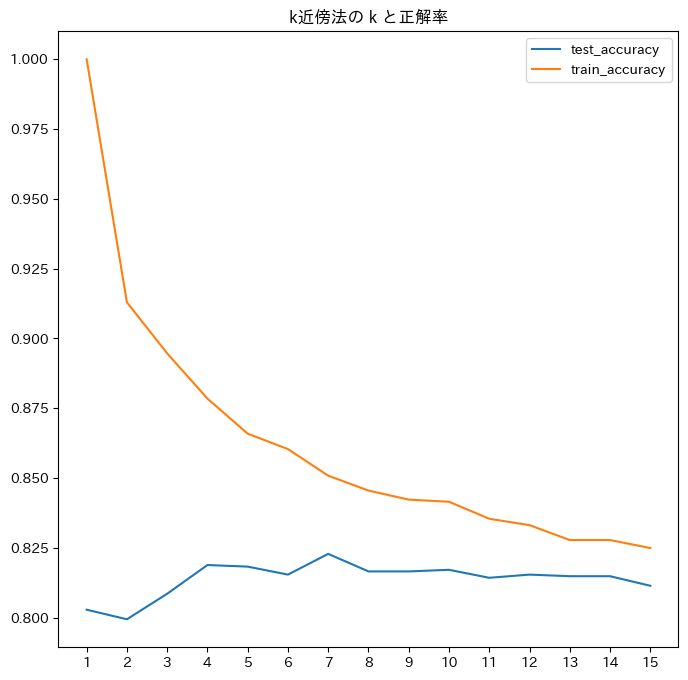

In [9]:
import statistics
import japanize_matplotlib

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
i = 0
k = []
test_accuracy = []
train_accuracy = []
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)
print(len(x_train), len(x_test), len(y_train), len(y_test))
print(x_train.shape, y_train.shape)

for _k in range(1, 16):
    # k近傍法で学習データを学習 (kは1-15まで設定)
    clf = KNeighborsClassifier(n_neighbors=_k, weights='uniform', algorithm='auto', p=2)
    clf = clf.fit(x_train, y_train)  # * y_trainの列指定はwarning回避のため *

    # 学習用データに対する正解率を計算
    predict_train = clf.predict(x_train)
    _train_accuracy = metrics.accuracy_score(y_train, predict_train)

    # 検証用データに対する正解率を計算
    predict_test = clf.predict(x_test)
    _test_accuracy = metrics.accuracy_score(y_test, predict_test)

    # 学習用データと検証用データにおける正解率を表示
    print(f'k={_k}', '(train) 正解率', _train_accuracy, '(test) 正解率', _test_accuracy)

    # kを変えた場合の学習用データと検証用データの正解率グラフのデータを準備
    k.append(_k)
    train_accuracy.append(_train_accuracy)
    test_accuracy.append(_test_accuracy)


# 各決定係数をヒストグラムに表示 (ビンの幅・数を揃えて、透過色で重ね合わせて表示)
ax.set_title(f'k近傍法の k と正解率')
ax.plot(k, test_accuracy, label='test_accuracy')
ax.plot(k, train_accuracy, label='train_accuracy')
ax.set_xticks(np.arange(1, 16, step=1))
ax.legend()  # loc='upper left'

plt.show()

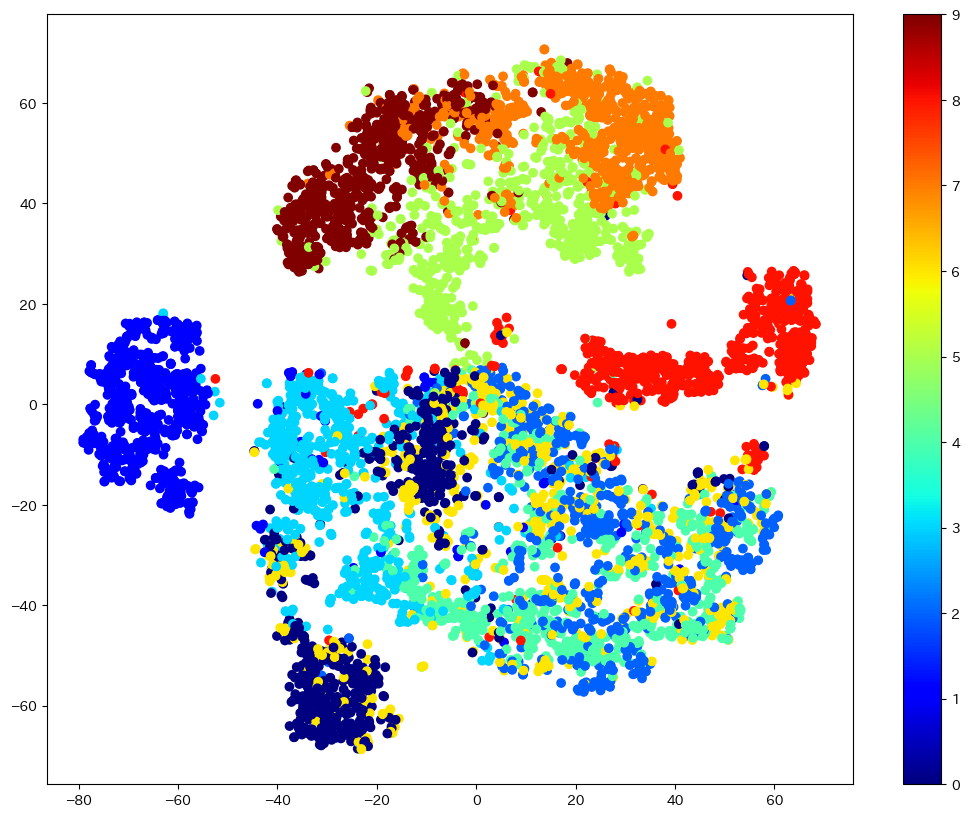

In [10]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='random', learning_rate='auto')
x_reduced  = tsne.fit_transform(x)

plt.figure(figsize=(13,10))
plt.scatter(x_reduced[:, 0], x_reduced[:, 1], c=y, cmap="jet")
plt.colorbar()
plt.show()

In [11]:
import lightgbm as lgb

# lgb_train = lgb.Dataset(x_train, y_train)

gbm = lgb.LGBMClassifier(
    verbosity=-1
    # min_data_in_bin=1
)

gbm.fit(x_train, y_train)
p = gbm.predict(x_test)

In [12]:
print("Test Accuracy\t: {:.4f}".format(metrics.accuracy_score(y_test, p)))
print("Train Accuracy\t: {:.4f}".format(metrics.accuracy_score(y_train, gbm.predict(x_train))))

Test Accuracy	: 0.8674
Train Accuracy	: 1.0000


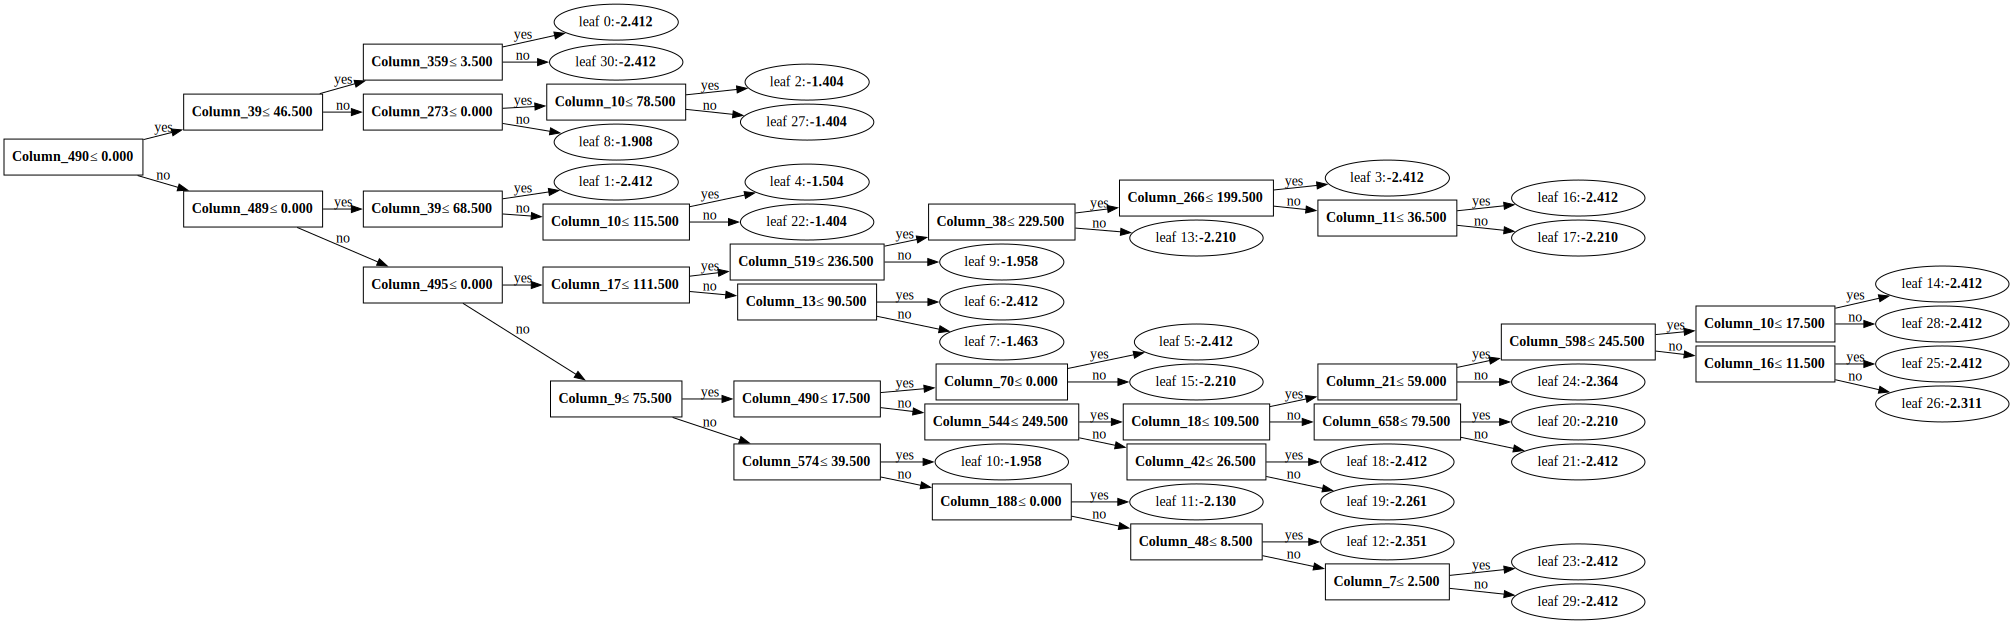

In [13]:
lgb.create_tree_digraph(gbm, 1)